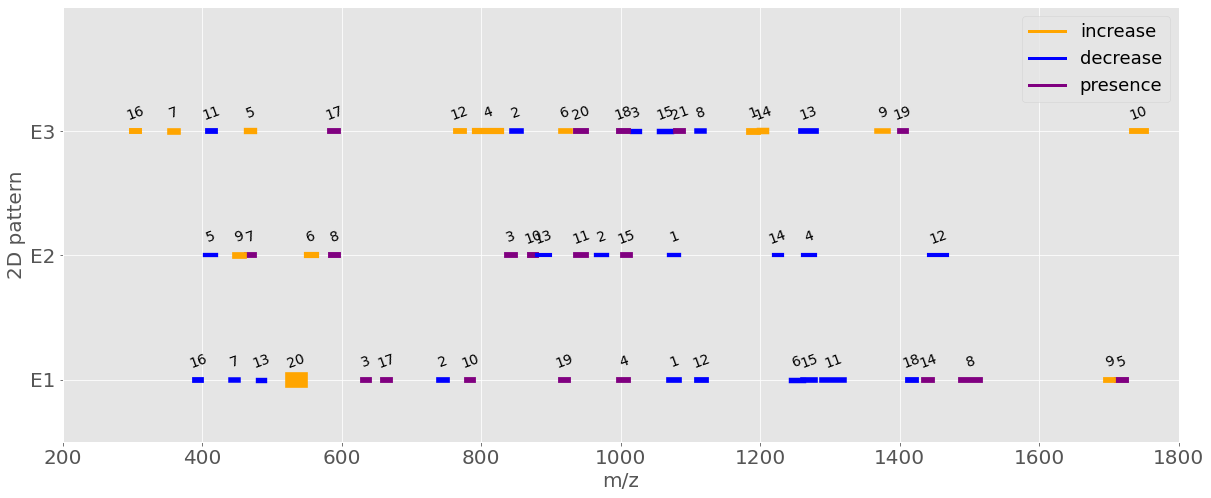

In [18]:
# SCRIPT TO GENERATE A  2D PROJECTON PLOT OF PATTERN 
# WITH QUALITATIVE INFORMATION ASSOCIATED TO X RANGE OF X VALUES    

#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


#define style of plot and size of figure
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 8)


# Generate a continous line interval to plot 
def ContinuousLineToPlot(y , xi, xf):
    Xdata= range(xi,xf)
    Ydata= []
    for x in Xdata:
        Ydata.append(y)
    return [Xdata, Ydata]


# function for converting mapped numerical key values into python color codes  
def VectorToColors(Vector, colors, numerical):
    ColorVector=[]
    for value in Vector:
        if value ==  numerical[0]:
          ColorVector.append(colors[0])
        elif value ==  numerical[1]:
          ColorVector.append(colors[1])
        elif value ==  numerical[2]:
          ColorVector.append(colors[2])
    return ColorVector        


# Define lists examples with pattern data ( 1, 2 and 3 example) 
# x ranges (initial i and final f), intensity/weight value (W) and qualitative interpretation (Q)

data_1i = [1070,740,630,998,1712,1244,442,1488,1696,780,1289,1110,480,1435,1262,390,660,1412,915,530]
data_1f = [1085,752,640,1012,1726,1262,453,1516,1707,790,1322,1124,490,1448,1280,400,670,1424,926,541 ]
data_1W = [ 0.68095809,0.685257503,0.80620155,0.80620155,0.892703863,0.467721583,0.509541802,0.80620155,0.800786996,0.80620155,0.557209241,0.7644291,0.394270261,0.80620155,0.616513922,0.797027859,0.823943662,0.801691272,0.823943662,10.64537917]
data_1Q = [ -1,-1,0,0,0,-1,-1,0,1,0,-1,-1,-1,0,-1,-1,0,-1,0,1 ]

data_2i = [ 1070,965,837,1262,404,550,464,585,447,870,936,1442,880,1220,1003]
data_2f = [ 1085,982,850,1280,421,564,476,596,460,880,952,1469,900,1232,1014]
data_2W = [ -0.708154325,-0.700506424,0.828025478,-0.829083916,-0.728438878,1.175107733,0.8125,
           0.896551724,1.721983368,0.896551724,0.828025478,-0.872555939,-0.907974003,-0.811198471,0.8125]
data_2Q = [ -1,-1,0,-1,-1,1,0,0,1,0,0,-1,-1,-1,0 ]

data_3i = [ 1184,844,1016,792,464,914,354,1110,1368,1733,409,764,1258,1200,1055,300,584,998,1400,936,1080]
data_3f = [1196,858,1028,829,476,928,365,1120,1384,1754,420,776,1281,1210,1074,310,596,1012,1410,952,1091]
data_3W = [1.788280832,0.615913927,0.301403212,1.190921211,1.318046364,0.683137197,1.623141845,0.521071158,0.569747071,0.842497211,0.808605192,0.829886489,0.709277073,1.496913925,0.468237342,0.941928915,0.835714286,0.887804878,0.798245614,0.866666667,0.835714286]
data_3Q = [ 1,-1,-1,1,1,1,1,-1,1,1,-1,1,-1,1,-1,1,0,0,0,0,0]


# Set a list of lists with pattern data to plot
Patterns = [ [data_1i, data_1f, data_1W, data_1Q ] , 
              [data_2i, data_2f , data_2W, data_2Q ]  , 
              [data_3i, data_3f, data_3W, data_3Q]  ] 

#define positional Y values for the pattern plots and lables intrepretation
Ypatterns_values = [1, 2 , 3]
Lables = [ "increase", "decrease", "presence"]

# define mapped colors and numbers
numerical  = [ 1, -1 , 0 ] 
colors = ["orange", "blue", "purple" ]

#PLOT data
for n, model in enumerate(Patterns):
    Y = Ypatterns_values[n]
    L = Lables[n] 
    W = model[2]
    C = VectorToColors(model[3], colors, numerical)
    for i, Vxi in enumerate(model[0]):
        iText = ""+str(i +1 )  
        Vxf = model[1][i]  
        FT= ContinuousLineToPlot(Y , Vxi, Vxf)
        TextPosition = float(min(FT[0]) + max(FT[0])) / 2   
        plt.plot(FT[0], FT[1],  color = C[i] , linewidth = 5 + W[i])
        plt. text( TextPosition, min(FT[1]) + 0.15 , iText , horizontalalignment='center', fontsize=14 , rotation=20,verticalalignment='center')

# define pattern lables         
for i, c in  enumerate(colors):
    plt.plot( [], [],  color = c  ,linewidth=3, label= Lables[i])

plt.xlabel('m/z' , size = 20)
plt.ylabel('2D pattern' , size = 20)
plt.tick_params(axis='both', labelsize = 20) # set the font of axis values
plt.legend( fontsize = 18)
plt.yticks([1, 2, 3], ["E1" , "E2", "E3" ] , fontsize=20, rotation = 0)
plt.axis([200, 1800, 0.5, 4] )
plt.show() 

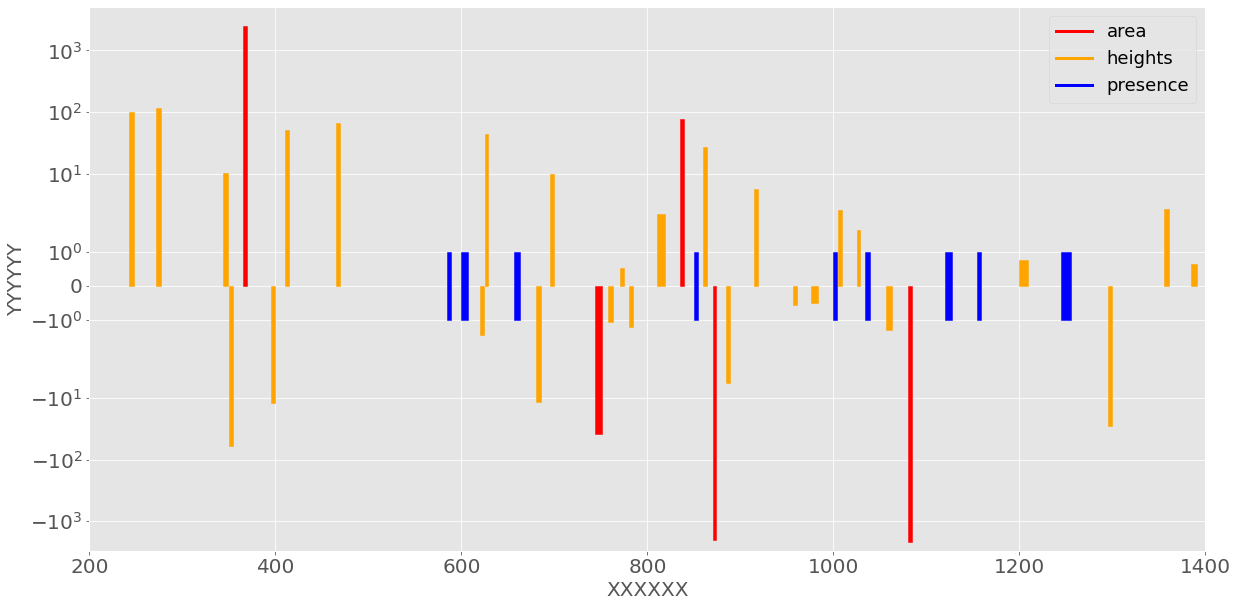

In [9]:
# ANOTHER WAY TO PLOT IT BUT WITH FOCUS ON QUANTITATIVE VARIATIONS


# Functions for getting patterns 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math 

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)


def ContinousLineToPlot(y , xi, xf):
    Xdata= range(xi,xf)
    Ydata= []
    for x in Xdata:
        Ydata.append(y)
    return [Xdata, Ydata]
        
def VectorToColors(Colors , Vector, Type ):
    ColorVector=[]
    for value in Vector:
        value = value.split(" ")[0] 
        value = value.split("\n")[0]
        if value ==  Type[0]:
          ColorVector.append(Colors[0])
        elif value ==  Type[1]:
          ColorVector.append(Colors[1])
        elif value ==  Type[2]:
          ColorVector.append(Colors[2])
    return ColorVector        
    
def Plot2Dpattern ( mzi, mzf, var , typ, Colors, Lables, axisLIM, legend_option ): 
    plt.rcParams['figure.figsize'] = (20, 10)
    C = VectorToColors( Colors, typ, Lables )
    for i, Vxi in enumerate(mzi):  
        Vxf = mzf[i]
        if float(var[i]) > 0 or float(var[i]) < 0:
            FT1= ContinousLineToPlot( var[i] , Vxi, Vxf)
            FT2= ContinousLineToPlot( 0 , Vxi, Vxf)
        else:
            FT1= ContinousLineToPlot( -1 , Vxi, Vxf)
            FT2= ContinousLineToPlot( 1 , Vxi, Vxf)
        plt.fill_between( FT1[0] , FT1[1], FT2[1] , facecolor = C[i] ,
                             color=C[i], alpha = 1  )
    if legend_option == "yes": 
        plt.plot( [], [],  color = Colors[0], label=  Lables[0], linewidth = 3  )
        plt.plot( [], [],  color = Colors[1], label=  Lables[1], linewidth = 3  )
        plt.plot( [], [],  color = Colors[2], label=  Lables[2], linewidth = 3  )
        plt.legend( fontsize = 18)
    plt.xlabel('XXXXXX' , size = 20)
    plt.ylabel('YYYYYY' , size = 20)
    plt.tick_params(axis='both', labelsize = 20) # set the font of axis values
    plt.yscale('symlog')
    plt.axis(axisLIM )
    plt.show() 


# data input example

# begining and the end of X values to input for ranges to show as 2 lists   
Ini = [976, 744, 1120, 395, 350, 915, 850, 410, 860, 810, 770, 465, 625, 1154, 242, 680, 1384, 780, 365, 620, 272, 1295, 1005, 884, 600, 835, 656, 758, 1355, 344, 956, 1200, 870, 1025, 1034, 1000, 1245, 1056, 584, 1080, 695]
Fin = [984, 752, 1128, 400, 355, 920, 855, 416, 865, 820, 776, 470, 630, 1160, 249, 686, 1392, 785, 370, 625, 278, 1300, 1010, 890, 608, 840, 664, 764, 1362, 350, 962, 1210, 875, 1030, 1040, 1005, 1256, 1064, 590, 1085, 700]

# quantitative values to show for each range
Var = [-0.48893977200000005, -37.98832598, 0.0, -12.025595246000002, -60.02250933, 5.793880938000001, 0.0, 51.820737922, 26.87794575000001, 2.278812757, 0.512198409, 67.618646109, 45.112724078, 0.0, 101.81412870000008, -11.66318737, 0.627501928, -1.2108075980000002, 2474.790368, -1.430610151, 117.70753541900001, -28.779647340000004, 2.567814998, -5.843118613, 0.0, 76.64354692000002, 0.0, -1.046583477, 2.6882639320000004, 10.463098648999999, -0.5653883, 0.760230769, -2001.6723379999994, 1.633747757, 0.0, 0.0, 0.0, -1.287463202, 0.0, -2162.046229, 9.959055740000004]

#lables of each range of values
VL = ['heights', 'area', 'presence', 'heights', 'heights', 'heights', 'presence', 'heights', 'heights', 'heights', 'heights', 'heights', 'heights', 'presence', 'heights', 'heights', 'heights', 'heights', 'area', 'heights', 'heights', 'heights', 'heights', 'heights', 'presence', 'area', 'presence', 'heights', 'heights', 'heights', 'heights', 'heights', 'area', 'heights', 'presence', 'presence', 'presence', 'heights', 'presence', 'area', 'heights']

#run the plot as a funtion with input parameters
Plot2Dpattern ( Ini , Fin, 
                  Var , VL, 
                  ["red", "orange", "blue" ] , 
                  ["area", "heights", "presence" ], 
                  [200, 1400, -3000 , 5000], "yes" )    
    
